In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
weather_api_key = "1b46ade959de952e53b0ab2e87d2e816"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df=pd.DataFrame(cities)
cities_df.columns=['cities']
cities_df

,cities
0,saint-philippe
1,qaanaaq
2,port alfred
3,necochea
4,bethel
...,...
569,yeppoon
570,okhotsk
571,katesh
572,petatlan


In [13]:
city_name=[]
lats = []
lngs = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"

for index,row in cities_df.iterrows(): 
    print(f"Processing Record {index}, {row}")    
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + row['cities'] +"&units=imperial"
        response = requests.get(query_url).json()  
        city_name.append(response['name'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt']) 
    except:
        print("City not found. Skipping...")
        city_name.append("")
        lats.append("")
        lngs.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")

Processing Record 0, cities    blairmore
Name: 0, dtype: object
Processing Record 1, cities    bredasdorp
Name: 1, dtype: object
Processing Record 2, cities    kapaa
Name: 2, dtype: object
Processing Record 3, cities    port alfred
Name: 3, dtype: object
Processing Record 4, cities    thompson
Name: 4, dtype: object
Processing Record 5, cities    vaini
Name: 5, dtype: object
Processing Record 6, cities    puerto ayora
Name: 6, dtype: object
Processing Record 7, cities    banjar
Name: 7, dtype: object
Processing Record 8, cities    georgetown
Name: 8, dtype: object
Processing Record 9, cities    port elizabeth
Name: 9, dtype: object
Processing Record 10, cities    tokmak
Name: 10, dtype: object
Processing Record 11, cities    karauzyak
Name: 11, dtype: object
City not found. Skipping...
Processing Record 12, cities    bluff
Name: 12, dtype: object
Processing Record 13, cities    saskylakh
Name: 13, dtype: object
Processing Record 14, cities    souillac
Name: 14, dtype: object
Processing

Processing Record 122, cities    tamandare
Name: 122, dtype: object
Processing Record 123, cities    quatre cocos
Name: 123, dtype: object
Processing Record 124, cities    arraial do cabo
Name: 124, dtype: object
Processing Record 125, cities    kaitangata
Name: 125, dtype: object
Processing Record 126, cities    do gonbadan
Name: 126, dtype: object
Processing Record 127, cities    norman wells
Name: 127, dtype: object
Processing Record 128, cities    rokytne
Name: 128, dtype: object
Processing Record 129, cities    cap malheureux
Name: 129, dtype: object
Processing Record 130, cities    cockburn town
Name: 130, dtype: object
Processing Record 131, cities    petropavlovsk-kamchatskiy
Name: 131, dtype: object
Processing Record 132, cities    berlevag
Name: 132, dtype: object
Processing Record 133, cities    te anau
Name: 133, dtype: object
Processing Record 134, cities    tarbagatay
Name: 134, dtype: object
Processing Record 135, cities    wilmington
Name: 135, dtype: object
Processing 

Processing Record 242, cities    martapura
Name: 242, dtype: object
Processing Record 243, cities    merauke
Name: 243, dtype: object
Processing Record 244, cities    uglekamensk
Name: 244, dtype: object
Processing Record 245, cities    santa cruz de la palma
Name: 245, dtype: object
Processing Record 246, cities    okhotsk
Name: 246, dtype: object
Processing Record 247, cities    kuusamo
Name: 247, dtype: object
Processing Record 248, cities    ulaanbaatar
Name: 248, dtype: object
Processing Record 249, cities    solnechnyy
Name: 249, dtype: object
Processing Record 250, cities    clyde river
Name: 250, dtype: object
Processing Record 251, cities    mareeba
Name: 251, dtype: object
Processing Record 252, cities    townsville
Name: 252, dtype: object
Processing Record 253, cities    puerto pinasco
Name: 253, dtype: object
City not found. Skipping...
Processing Record 254, cities    piterka
Name: 254, dtype: object
Processing Record 255, cities    kristiansund
Name: 255, dtype: object
P

City not found. Skipping...
Processing Record 359, cities    malappuram
Name: 359, dtype: object
Processing Record 360, cities    vila do maio
Name: 360, dtype: object
Processing Record 361, cities    yelnya
Name: 361, dtype: object
Processing Record 362, cities    salekhard
Name: 362, dtype: object
Processing Record 363, cities    la asuncion
Name: 363, dtype: object
Processing Record 364, cities    seoul
Name: 364, dtype: object
Processing Record 365, cities    zyryanka
Name: 365, dtype: object
Processing Record 366, cities    jilmah
Name: 366, dtype: object
City not found. Skipping...
Processing Record 367, cities    yulara
Name: 367, dtype: object
Processing Record 368, cities    kankon
Name: 368, dtype: object
Processing Record 369, cities    tumaco
Name: 369, dtype: object
Processing Record 370, cities    kismayo
Name: 370, dtype: object
Processing Record 371, cities    roebourne
Name: 371, dtype: object
Processing Record 372, cities    naze
Name: 372, dtype: object
Processing Re

City not found. Skipping...
Processing Record 477, cities    nola
Name: 477, dtype: object
Processing Record 478, cities    hambantota
Name: 478, dtype: object
Processing Record 479, cities    ahumada
Name: 479, dtype: object
City not found. Skipping...
Processing Record 480, cities    dieppe bay
Name: 480, dtype: object
City not found. Skipping...
Processing Record 481, cities    safaga
Name: 481, dtype: object
Processing Record 482, cities    elko
Name: 482, dtype: object
Processing Record 483, cities    ajaccio
Name: 483, dtype: object
Processing Record 484, cities    necochea
Name: 484, dtype: object
Processing Record 485, cities    puerto madero
Name: 485, dtype: object
Processing Record 486, cities    pinawa
Name: 486, dtype: object
Processing Record 487, cities    krasnoarmeysk
Name: 487, dtype: object
Processing Record 488, cities    kaolinovo
Name: 488, dtype: object
Processing Record 489, cities    mayor pablo lagerenza
Name: 489, dtype: object
Processing Record 490, cities  

In [14]:
len(lats)

590

In [35]:
#create dataframe
cities_df["city_name"]= cities
cities_df["city"]= city_name
cities_df["lats"]= lats
cities_df["lngs"]= lngs
cities_df["max_temp"]= max_temp
cities_df["humidity"]= humidity
cities_df["cloudiness"]= cloudiness
cities_df["wind_speed"]=wind_speed
cities_df["country"]=  country
cities_df["date"]= date
cities_df=cities_df[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df

ValueError: Length of values does not match length of index

In [16]:
cities_df2=cities_df[["lats","lngs","max_temp","humidity","cloudiness","wind_speed"]].apply(pd.to_numeric) 
print(cities_df2.dtypes) 
cities_df2["city_name"]= cities
cities_df2["city"]= city_name
cities_df2["country"]=  country
cities_df2["date"]= date
cities_df2=cities_df2[["city_name","city","lats","lngs","max_temp","humidity","cloudiness","wind_speed","country","date"]]
cities_df2

lats          float64
lngs          float64
max_temp      float64
humidity      float64
cloudiness    float64
wind_speed    float64
dtype: object


,city_name,city,lats,lngs,max_temp,humidity,cloudiness,wind_speed,country,date
0,blairmore,Blairmore,49.60,-114.44,73.40,46.0,1.0,12.75,CA,1598382294
1,bredasdorp,Bredasdorp,-34.53,20.04,57.20,93.0,100.0,10.29,ZA,1598382067
2,kapaa,Kapaa,22.08,-159.32,81.00,74.0,20.0,14.99,US,1598382294
3,port alfred,Port Alfred,-33.59,26.89,62.35,72.0,0.0,16.22,ZA,1598382294
4,thompson,Thompson,55.74,-97.86,51.80,76.0,90.0,8.05,CA,1598382183
...,...,...,...,...,...,...,...,...,...,...
585,utiroa,,NaN,NaN,NaN,NaN,NaN,NaN,,
586,luanda,Luanda,-8.84,13.23,75.20,78.0,75.0,6.93,AO,1598382158
587,tahoua,Tahoua,14.89,5.27,86.00,62.0,40.0,4.70,NE,1598382362
588,voi,Voi,-3.39,38.56,69.35,79.0,7.0,9.93,KE,1598382363


In [36]:
#  Get the indices of cities that have humidity greater or equal to 100%.
humidity_100 = cities_df2.loc[(cities_df2['humidity'] >= 100)]
humidity_100.count()

city_name     13
city          13
lats          13
lngs          13
max_temp      13
humidity      13
cloudiness    13
wind_speed    13
country       13
date          13
dtype: int64

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
clean_city_data =cities_df2.loc[cities_df2['humidity'] < 100]
clean_city_data['humidity'].count()

521

In [38]:
clean_city_data['humidity'].max()

99.0

In [39]:
clean_city_data2 = clean_city_data[["city","lngs","lats","max_temp","humidity","cloudiness","wind_speed"]]

clean_city_data2

# Export the City_Data into a csv

clean_city_data2.to_csv('output_data/cities.csv')

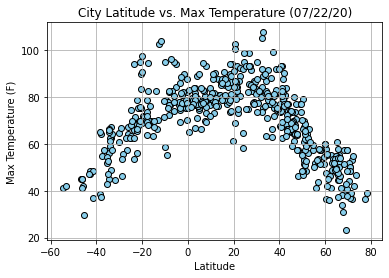

In [40]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["max_temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/figure1.png")
plt.show()

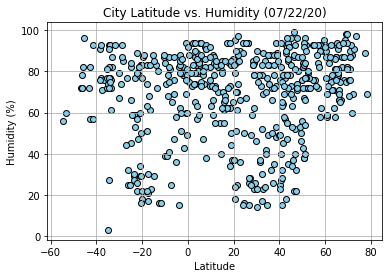

In [41]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/figure2.png")
plt.show()

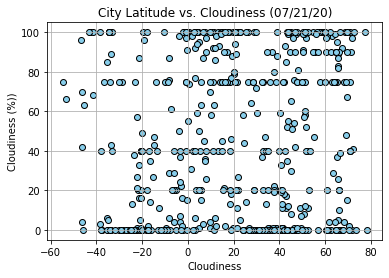

In [42]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/21/20)")
plt.xlabel("Cloudiness")
plt.ylabel("Cloudiness (%))")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/figure3.png")
plt.show()

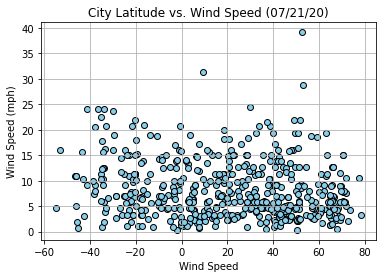

In [43]:
plt.scatter(clean_city_data2["lats"],clean_city_data2["wind_speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/21/20)")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/figure4.png")
plt.show()